In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# define simulation
n_conf = 1
n_particle = 108
n_frame = 10000

In [11]:
# define functions
def is_header(x):
    return np.remainder(x,n_particle+9)>8

def loaddump(filename):
    # load file
    with open(filename,'r') as fp:
        lines = fp.readlines()
    lines_header = lines[0:9]
    l = np.genfromtxt(lines_header[5:8], delimiter=' ')
    
    # remove headers
    nframe = n_frame
    index_all = range((n_particle+9)*nframe)
    
    index = list(filter(is_header, index_all))
    
    from operator import itemgetter
    lines_mod = list(itemgetter(*index)(lines))
    
    # convert to array
    data_np = np.genfromtxt(lines_mod, delimiter=' ')
    
    r = data_np[:,2:5]
    
    # reshape and permute
    r_all = np.reshape(r,(nframe,n_particle,3))
    r_all = r_all.transpose((1,2,0))
    
    return r_all, l

In [12]:
msd_list = []
filename_list = ["./LAMMPS/out_Al_298.dump","./out_Al_298_J.dump"]
for i_name, filename in enumerate(filename_list):
    r_all, l = loaddump(filename)
    r0 = r_all[:,:,0]
    msd = np.zeros(n_frame)
    for it in range(n_frame):
        rt = r_all[:,:,it]
        delta_rt = r0-rt
        msd[it] = np.sum(delta_rt**2)/n_particle
    msd_list.append(msd)

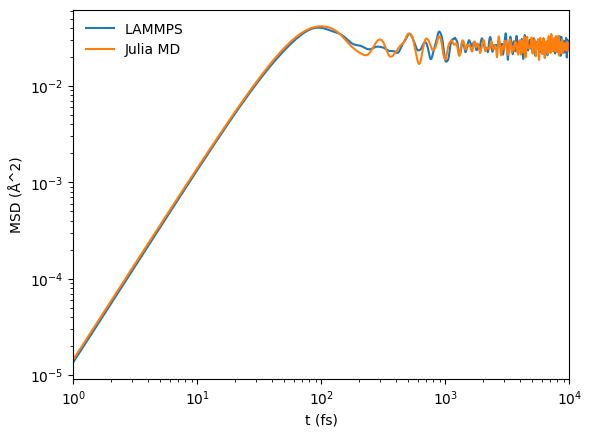

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

steps = np.arange(n_frame)

label_list = ["LAMMPS", "Julia MD"]
for i_name, filename in enumerate(filename_list):
    # Plot each line separately
    ax.plot(steps, msd_list[i_name], '-', label=label_list[i_name])

ax.set_xlabel('t (fs)')
ax.set_ylabel('MSD (Å^2)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1,1e4])
ax.legend(frameon=False)
fig.canvas.draw()  # forcing the artist to redraw itself